# 2. 머신러닝 프로젝트 처음부터 끝까지

## 2.1 실제 데이터로 작업하기

* 캘리포니아 주택가격 데이터 이용

## 2.2 큰그림 보기

* 인구조사 데이터를 사용해 캘리포니아 주택 가격 모델 생성

### 2.2.1 문제정의 (생략)

### 2.2.2 성능 측정 지표 

$RMSE$  
$MAE$

### 2.2.3 가정 검사 (생략)

## 2.3 데이터 가져오기

### 2.3.1 작업환경 만들기 (생략)

### 2.3.2 데이터 다운로드

In [70]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")                      # 파일 저장 경로. 파일명 함께 지정.
    if not tarball_path.is_file():                                   # 아직 다운로드하지 않은 경우
        Path("datasets").mkdir(parents=True, exist_ok=True)          # 폴더 생성
        url = "https://github.com/ageron/data/raw/main/housing.tgz"  # 파일 다운로드
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:          # tgz 파일 압축 풀기
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))         # 압축 풀린 csv 파일 불러오기

### 2.3.3 데이터 구조 훑어보기

In [71]:
housing = load_housing_data()

In [72]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [73]:
housing.info()

# info() 메서드 : 데이터에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입과 넝리 아닌 값의 개수를 확인 할 수 있다
# ocean_proximity 열 : object 타입으로 어떤 객체도 될 수 있지만, csv파일에서 읽었기 때문에 텍스트 특성이다(범주형)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [74]:
# ocean_proximity 확인

housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [75]:
housing.describe()

# describe 메소드 : 숫자형 특성의 요약 정보를 보여준다

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


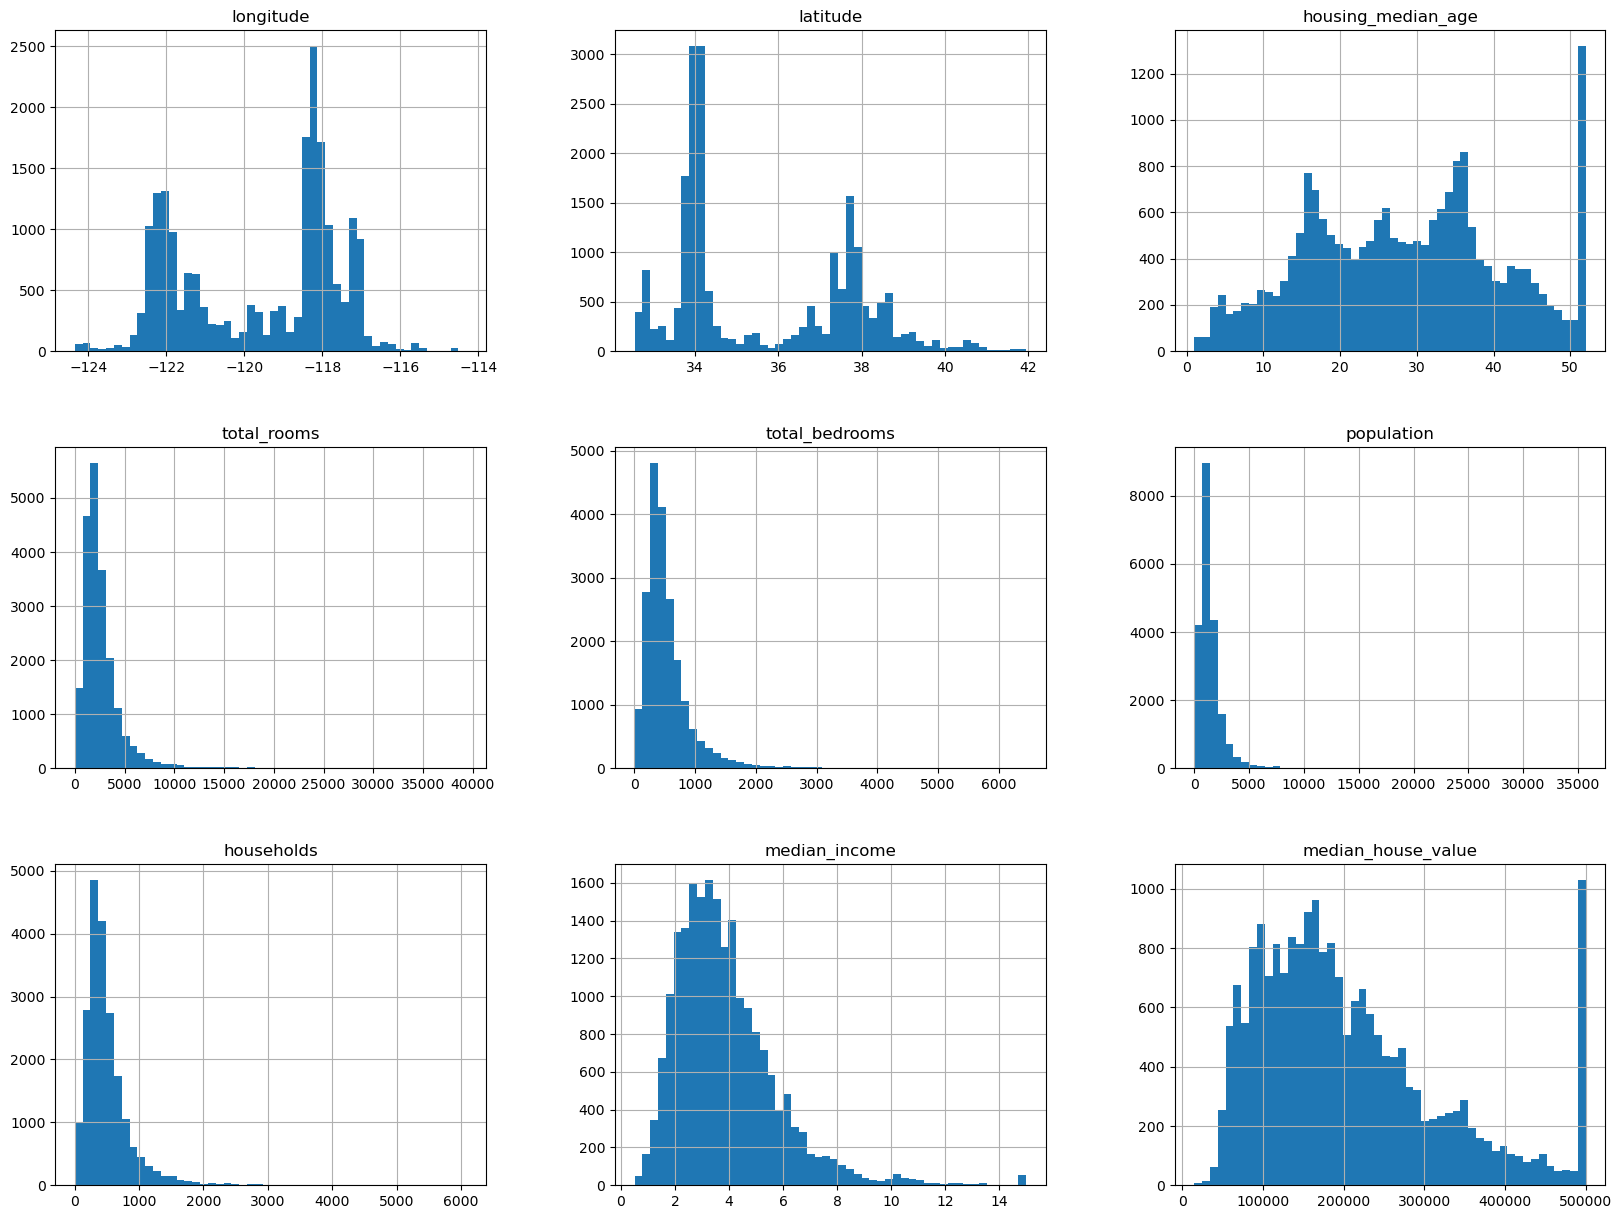

In [76]:
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins = 50, figsize = (20, 15))
plt.show()

In [77]:
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


### 2.3.4 테스트 세트 만들기

* 테스트셋은 모델 형성시 사용되면 안된다

In [78]:
# 간단한 테스트셋 생성

import numpy as np

def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio) 
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    
    return data.iloc[train_indices], data.iloc[test_indices]

In [79]:
train_set, test_set = split_train_test(housing, 0.2)

In [80]:
print(len(train_set))
print(len(test_set))

16512
4128


In [81]:
train_set.head(5) 

# index가 초기화 되있지 않다.

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
12523,-124.08,40.86,18.0,1287.0,484.0,805.0,502.0,1.1157,150000.0,NEAR OCEAN
4769,-122.78,38.53,9.0,3659.0,652.0,1889.0,632.0,4.2716,250800.0,<1H OCEAN
10962,-119.55,37.75,30.0,2165.0,536.0,1500.0,414.0,3.5391,55900.0,INLAND
12911,-116.60,33.06,23.0,1731.0,365.0,612.0,258.0,2.7813,172900.0,INLAND
4110,-117.64,34.03,11.0,2050.0,382.0,1044.0,371.0,4.8281,137000.0,INLAND


In [82]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [83]:
# 소득(연속형)을 구간을 나누어 범주형으로 변환

housing['income_cat'] = pd.cut(housing['median_income'],
                               bins = [0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels = [1,2,3,4,5])

<Axes: >

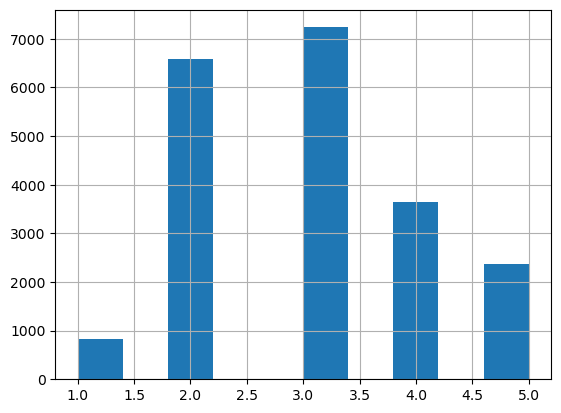

In [84]:
housing['income_cat'].hist()

In [85]:
# 소득 카테고리르 기반으로 계층 샘플링

from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['income_cat']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [86]:
strat_test_set['income_cat'].value_counts()/len(strat_test_set)

3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: income_cat, dtype: float64

In [87]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop('income_cat', axis = 1, inplace = True)

# income_cat 열 삭제

## 2.4 데이터 이해를 위한 탐색과 시각화

In [88]:
# 훈련 세트를 손상시키지 않기 위해 복사본을 만들어 사용

housing = strat_train_set.copy()

In [89]:
# copy 를 하는 이유

a = np.arange(10)
b = a
b[0] = 100
print(a)

[100   1   2   3   4   5   6   7   8   9]


### 2.4.1 지리적 데이터 시각화

<Axes: xlabel='longitude', ylabel='latitude'>

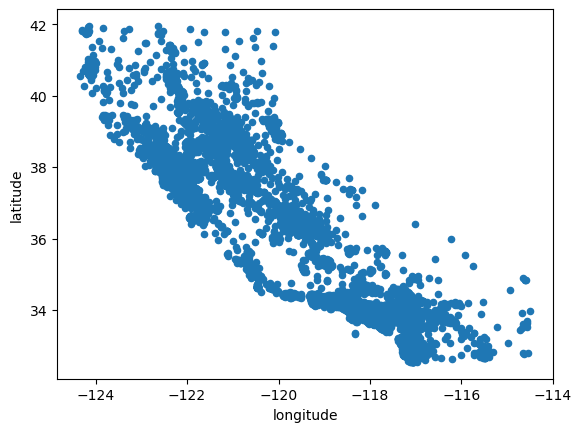

In [90]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude')

<Axes: xlabel='longitude', ylabel='latitude'>

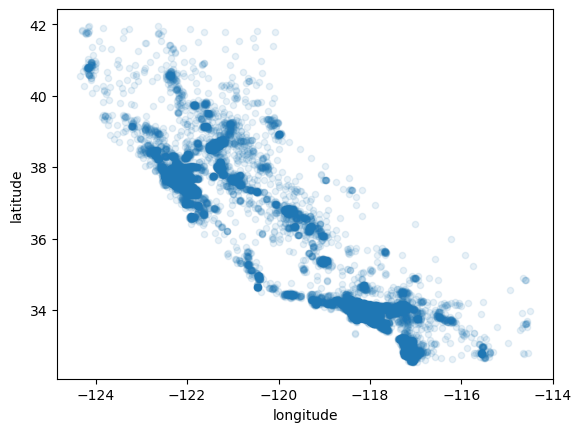

In [91]:
# alpha 옵션을 이용해 밀집도를 확인할 수 있다

housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.1)

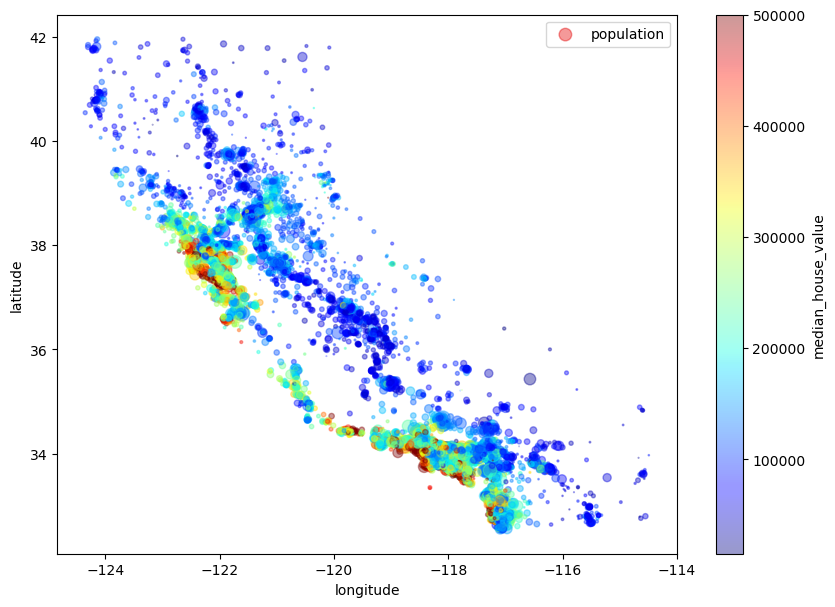

In [92]:
housing.plot(kind = 'scatter', x = 'longitude', y = 'latitude', alpha = 0.4, 
             s = housing['population']/100, label = 'population', figsize = (10, 7),
             c = 'median_house_value', cmap = plt.get_cmap('jet'), colorbar = True, sharex = False)
plt.legend()

### 2.4.2 상관관계 조사

* 상관관계는 선형적인 관계만 측정된다
* 비선형적 관계는 측정할수 없다(비선형적관계도 관계가 있다고 볼 수 있다)

In [93]:
corr_matrix = housing.corr(numeric_only = True)

In [94]:
corr_matrix['median_house_value'].sort_values(ascending = False)

median_house_value    1.000000
median_income         0.688380
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
longitude            -0.050859
latitude             -0.139584
Name: median_house_value, dtype: float64

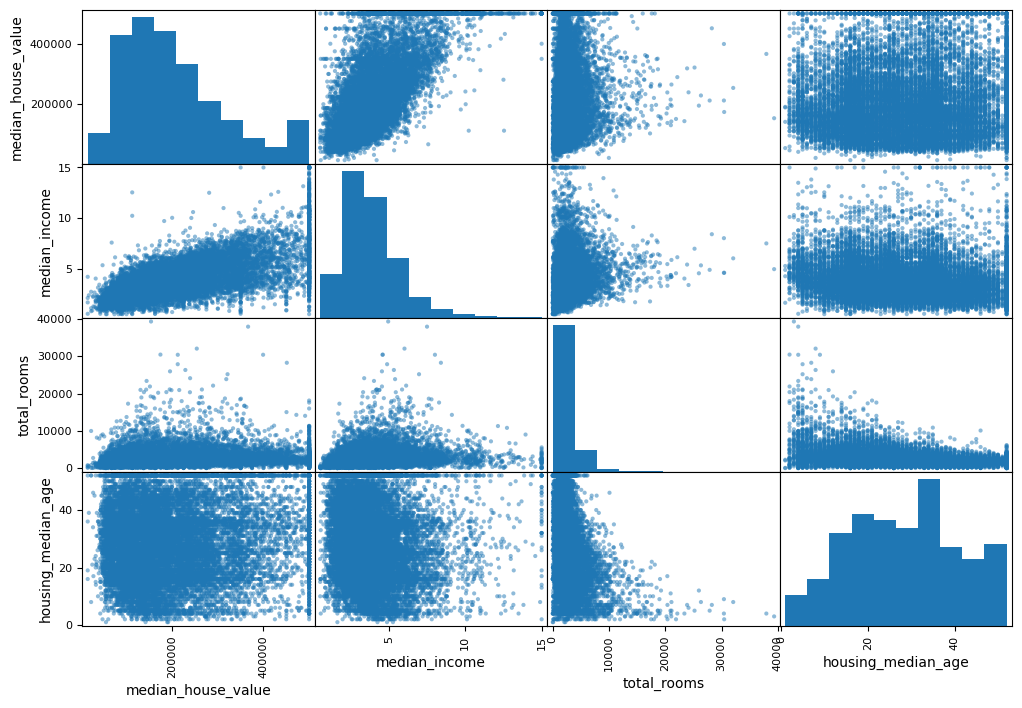

In [95]:
from pandas.plotting import scatter_matrix

attributes = ['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']
scatter_matrix(housing[attributes], figsize = (12, 8))
plt.show()

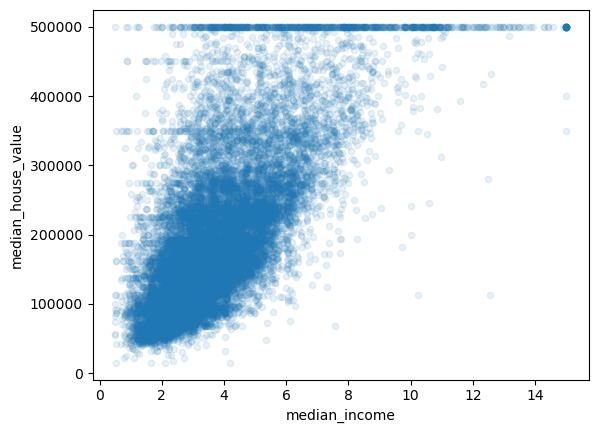

상관계수 :  0.688380286783994


In [96]:
housing.plot(kind = 'scatter', x = 'median_income', y = 'median_house_value', alpha = 0.1)
plt.show()
print('상관계수 : ', corr_matrix['median_income']['median_house_value'])

# 상관관계가 강하다
# 가격 제한값 500,000에서 수평으로 잘 보임
# 450,000 / 350,000 / 280,000 에도 수평이 보임
# 이러한 데이터는 학습때 배제하는게 좋다

### 2.4.3 특성 조합으로 실험

In [97]:
housing['rooms_per_household'] = housing['total_rooms'] / housing['households'] # 가구당 방 수 
housing['bedrooms_per_room'] = housing['total_bedrooms'] / housing['total_rooms'] # 전체 방 중 침실 수
housing['population_per_house_holds'] = housing['population'] / housing['households'] # 가구당 인구수

In [98]:
corr_matrix = housing.corr(numeric_only = True)
corr_matrix['median_house_value'].sort_values(ascending = False)

# 파생변수들의 상관계수가 더 높다

median_house_value            1.000000
median_income                 0.688380
rooms_per_household           0.143663
total_rooms                   0.137455
housing_median_age            0.102175
households                    0.071426
total_bedrooms                0.054635
population                   -0.020153
population_per_house_holds   -0.038224
longitude                    -0.050859
latitude                     -0.139584
bedrooms_per_room            -0.256397
Name: median_house_value, dtype: float64

## 2.5 머신러닝 알고리즘을 위한 데이터 준비

In [99]:
housing = strat_train_set.drop('median_house_value', axis = 1)
housing_labels = strat_train_set['median_house_value'].copy() 
# copy를 안하면 housing_labels를 건들면 원본도 바뀜

### 2.5.1 데이터 정제

* 결측값(누락값) 처리

In [100]:
'''
housing.dropna(subset = ['total_bedrooms']) #옵션 1 / total_bedrooms의 결측행 제거

housing.drop('total_bedrooms', axis = 1) # 옵션 2 / total_bedrooms열 자체를 삭제

median = housing['total_bedrooms'].median() # 옵션 3 / total_bedrooms의 median으로 대체
housing['total_bedrooms'].fillna(median, inplace = True)
'''

"\nhousing.dropna(subset = ['total_bedrooms']) #옵션 1 / total_bedrooms의 결측행 제거\n\nhousing.drop('total_bedrooms', axis = 1) # 옵션 2 / total_bedrooms열 자체를 삭제\n\nmedian = housing['total_bedrooms'].median() # 옵션 3 / total_bedrooms의 median으로 대체\nhousing['total_bedrooms'].fillna(median, inplace = True)\n"

In [101]:
# 사이킷런의 SimpleImputer

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

In [102]:
housing_num = housing.drop(columns='ocean_proximity')

In [103]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [104]:
housing_num.isnull().sum()

# fit은 데이터셋에 맞는 imputer값을 찾는것, 이 경우 중앙값만 찾고 데이터프레임을 변환시키지는 않는다

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        168
population              0
households              0
median_income           0
dtype: int64

In [105]:
imputer.statistics_ 
# 대체할 중앙값들을 출력

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [106]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [107]:
X = imputer.transform(housing_num)

In [108]:
X

# fit된 중앙값을 이용하여 변환, 결과는 numpy array로 나온다

array([[-1.2242e+02,  3.7800e+01,  5.2000e+01, ...,  1.5760e+03,
         1.0340e+03,  2.0987e+00],
       [-1.1838e+02,  3.4140e+01,  4.0000e+01, ...,  6.6600e+02,
         3.5700e+02,  6.0876e+00],
       [-1.2198e+02,  3.8360e+01,  3.3000e+01, ...,  5.6200e+02,
         2.0300e+02,  2.4330e+00],
       ...,
       [-1.1706e+02,  3.2590e+01,  1.3000e+01, ...,  2.8140e+03,
         7.6000e+02,  4.0616e+00],
       [-1.1840e+02,  3.4060e+01,  3.7000e+01, ...,  1.7250e+03,
         8.3800e+02,  4.1455e+00],
       [-1.2241e+02,  3.7660e+01,  4.4000e+01, ...,  6.8200e+02,
         2.1200e+02,  3.2833e+00]])

In [109]:
housing_tr = pd.DataFrame(X, columns = housing_num.columns, index = housing_num.index)

### 2.5.2 텍스트와 범주형 특성 다루기

In [110]:
housing_cat = housing[['ocean_proximity']] # 괄호를 2개 쳐주면 데이텊프레임 형식으로 출력됨
housing_cat.head(10)

,ocean_proximity
13096,NEAR BAY
14973,<1H OCEAN
3785,INLAND
14689,INLAND
20507,NEAR OCEAN
1286,INLAND
18078,<1H OCEAN
4396,NEAR BAY
18031,<1H OCEAN
6753,<1H OCEAN


In [111]:
# 카테고리를 숫자로 변환

from sklearn.preprocessing import OrdinalEncoder

encoder = OrdinalEncoder()
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

In [112]:
# ordinal encoder는 df형식만 가능한가 ? yes

try:
    test_cate = housing['ocean_proximity']
    test_encode = encoder.fit_transform(test_cate)
    test_encode
except:
    print('error occur')

# series형태인 test_cate는 encoder를 사용할 수 없다

error occur


In [113]:
encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

이러한 방식은 category에 순서가 없기 때문에 옳지 않다  
즉 INLAND : 1 NEAR OCEAN : 4 일때 NEAR BAY : 3 보다 더 멀지 않기 때문이다 

In [114]:
# one-hot encoiding

from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

# 출력값은 Scipy의 sparse matrix(matrix의 대부분의 값이 0인 행렬) 

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [115]:
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

In [116]:
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

### 2.5.3 나만의 변환기 
p.105

In [117]:
from sklearn.base import BaseEstimator, TransformerMixin

rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y = None):
        return self
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [118]:
housing_extra_attribs

array([[-122.42, 37.8, 52.0, ..., 'NEAR BAY', 3.211798839458414,
        1.5241779497098646],
       [-118.38, 34.14, 40.0, ..., '<1H OCEAN', 5.504201680672269,
        1.865546218487395],
       [-121.98, 38.36, 33.0, ..., 'INLAND', 5.334975369458128,
        2.768472906403941],
       ...,
       [-117.06, 32.59, 13.0, ..., 'NEAR OCEAN', 5.157894736842105,
        3.7026315789473685],
       [-118.4, 34.06, 37.0, ..., '<1H OCEAN', 4.511933174224343,
        2.058472553699284],
       [-122.41, 37.66, 44.0, ..., 'NEAR OCEAN', 2.0330188679245285,
        3.2169811320754715]], dtype=object)

### 2.5.4 특성 스케일링
p.107

* 특성별로 값의 범위 차이가 크다면 문제가 생길 수 있다
* e.g. 방 개수의 범위 : 6 ~ 39320 / 중간 소득의 범위 : 0 ~ 15 => 단위차이가 심함
* min-max 스케일링으로 모든 범위를 같게 만들어준다
---
***caution : 변환기를 사용할 때 train_set을 분리한후 train_set의 정보를 가지고 변환을 해줘야한다 즉 test_set의 개입은 없어야 한다***

### 2.5.5 변환 파이프 라인
p.108

In [119]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([('imputer', SimpleImputer(strategy='median')),
                         ('attribs_adder', CombineAttributesAdder()),
                         ('std_scaler', StandardScaler())])
housing_num_tr = num_pipeline.fit_transform(housing_num)

In [120]:
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

full_pipeline = ColumnTransformer([('num', num_pipeline, num_attribs),
                                   ('cat', OneHotEncoder(), cat_attribs)])
housing_prepared = full_pipeline.fit_transform(housing)

In [121]:
housing_prepared

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.59639445, -0.702103  ,  0.90762971, ...,  0.        ,
         0.        ,  0.        ],
       [-1.2030985 ,  1.27611874,  0.35142777, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41803793,  0.94797769,  1.22545939, ...,  0.        ,
         0.        ,  1.        ]])

## 2.6 모델 선택과 훈련
p.110

### 2.6.1 훈련 세트에서 훈련하고 평가하기
p.110

In [122]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [123]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [124]:
some_data_prepared = full_pipeline.transform(some_data)

In [125]:
print('예측: ', lin_reg.predict(some_data_prepared))
print('실제: ', list(some_labels))

예측:  [276608.27419651 333603.0303772  118237.5726011  108255.75159886
 308943.82732346]
실제:  [458300.0, 483800.0, 101700.0, 96100.0, 361800.0]


## 2.10 연습문제

# 1

